In [ ]:
#| hide
!pip install -Uqq nixtla

In [ ]:
#| hide 
from nixtla.utils import in_colab

In [ ]:
#| hide 
IN_COLAB = in_colab()

In [ ]:
#| hide
if not IN_COLAB:
    from nixtla.utils import colab_badge
    from dotenv import load_dotenv

# Add confidence levels

We can tweak the confidence level used for anomaly detection. By default, if a value falls outside of the 99% confidence interval, it is labelled as an anomaly. 

This is modified by the `level` parameter and it takes any value between 0 and 100, including decimal numbers. 

Increasing the `level` results in less anomalies detected, while decreasing the `level` increases the number of anomalies detected.

In [ ]:
#| echo: false
if not IN_COLAB:
    load_dotenv()
    colab_badge('docs/capabilities/anomaly-detection/04_confidence_levels')

[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nixtla/nixtla/blob/main/nbs/docs/capabilities/anomaly-detection/04_confidence_levels.ipynb)

In [ ]:
import pandas as pd
from nixtla import NixtlaClient

In [ ]:
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'my_api_key_provided_by_nixtla'
)

> 👍 Use an Azure AI endpoint
> 
> To use an Azure AI endpoint, remember to set also the `base_url` argument:
> 
> `nixtla_client = NixtlaClient(
>         base_url="you azure ai endpoint",
>         api_key="your api_key"`
>)

In [ ]:
#| hide
if not IN_COLAB:
    nixtla_client = NixtlaClient()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Anomaly Detector Endpoint...


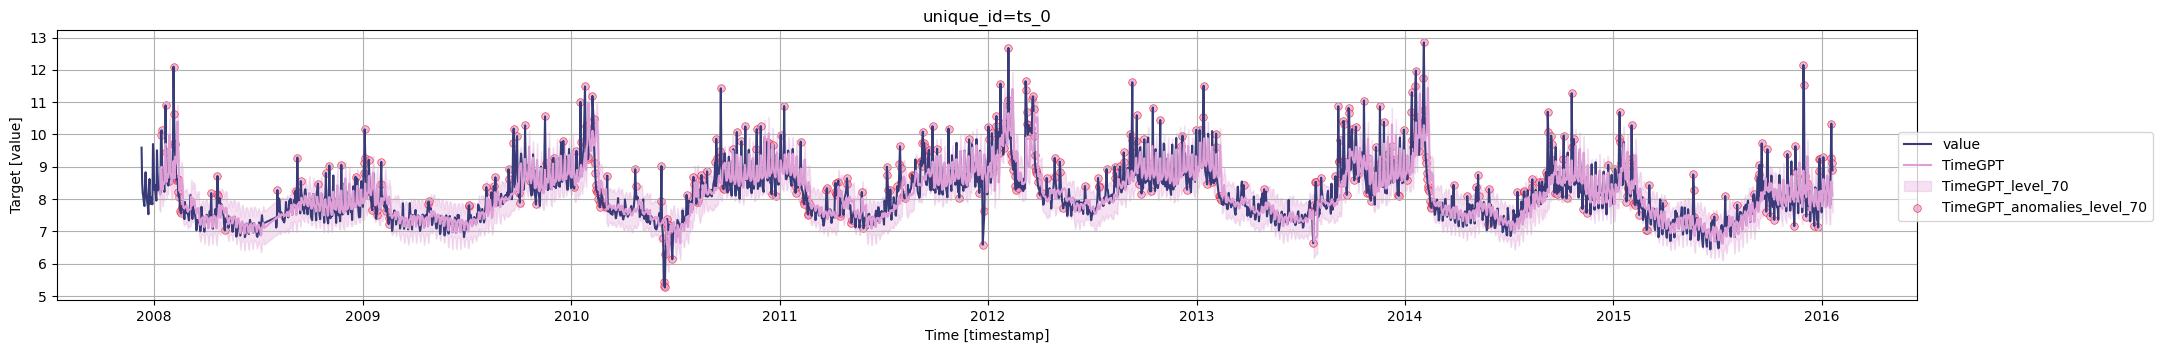

In [ ]:
# Read the data
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/peyton_manning.csv')

# Anomaly detection using a 70% confidence interval
anomalies_df = nixtla_client.detect_anomalies(
    df, 
    time_col='timestamp', 
    target_col='value', 
    freq='D',
    level=70
)

# Plot anomalies
nixtla_client.plot(
    df, 
    anomalies_df,
    time_col='timestamp', 
    target_col='value'
)

> 📘 Available models in Azure AI
>
> If you are using an Azure AI endpoint, please be sure to set `model="azureai"`:
>
> `nixtla_client.detect_anomalies(..., model="azureai")`
> 
> For the public API, we support two models: `timegpt-1` and `timegpt-1-long-horizon`. 
> 
> By default, `timegpt-1` is used. Please see [this tutorial](https://docs.nixtla.io/docs/tutorials-long_horizon_forecasting) on how and when to use `timegpt-1-long-horizon`.

For more information, read our detailed tutorial on [anomaly detection](https://docs.nixtla.io/docs/tutorials/anomaly_detection).